# Deep Learning Course: Lab Exercises

In this lab exercise you will:

a) Solve a simple Linear Regression problem with PyTorch.


#Solve a simple Linear Regression problem

Find the linear relationship between a dependent variable 'y' and an independent variable 'x'.

Equation: y = 3x + 4

In [49]:
## create dummy data for training
import numpy as np
x_train = np.random.uniform(low=0.0, high=10.0, size=(15,))
print(x_train)
x_train = np.array(x_train, dtype=np.float32)
x_train = x_train.reshape(-1, 1)
print(x_train)


[5.4636493  9.15721202 5.40590478 3.66095339 3.27272879 9.2327058
 4.59229723 8.97104037 3.43600321 8.31112621 7.203678   8.69148055
 5.85554671 2.46728872 7.05572392]
[[5.4636493]
 [9.157212 ]
 [5.405905 ]
 [3.6609533]
 [3.2727287]
 [9.232706 ]
 [4.592297 ]
 [8.971041 ]
 [3.4360032]
 [8.311126 ]
 [7.203678 ]
 [8.691481 ]
 [5.855547 ]
 [2.4672887]
 [7.055724 ]]


In [48]:
##create the y values according to equation y = 3x + 4
# *****START CODE
y_train = [3.0*i + 4.0 for i in x_train]
print(y_train)
# *****END CODE
y_train = np.array(y_train, dtype=np.float32)
y_train = y_train.reshape(-1, 1)

[array([27.763725], dtype=float32), array([8.892883], dtype=float32), array([11.229375], dtype=float32), array([31.244965], dtype=float32), array([11.285039], dtype=float32), array([14.656127], dtype=float32), array([30.753304], dtype=float32), array([7.9560366], dtype=float32), array([18.501781], dtype=float32), array([18.653723], dtype=float32), array([26.450592], dtype=float32), array([20.129927], dtype=float32), array([32.61521], dtype=float32), array([17.632], dtype=float32), array([33.019287], dtype=float32)]


In [37]:
import torch
##convert x_train and y_train values to pytorch tensors
# *****START CODE
x_train = torch.from_numpy(x_train)
y_train = torch.from_numpy(y_train)
# *****END CODE

In [38]:
class LinearRegression(torch.nn.Module):
    def __init__(self, in_size, out_size):
        super(LinearRegression, self).__init__()
        ##Define a linear layer
        # *****START CODE
        self.linear = torch.nn.Linear(in_size, out_size)
        # *****END CODE

    def forward(self, x):
        out = self.linear(x)
        return out

In [39]:
##define input and output dimensions of the model
# *****START CODE
in_dim = 1      
out_dim = 1     
# *****END CODE

LR = 0.01 
epochs = 100

model = LinearRegression(in_dim, out_dim)

In [40]:
criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=LR)

In [41]:
#model.train()
for epoch in range(epochs):
    # Set all gradients to zero
    optimizer.zero_grad()

    # feed the inputs to the model, and get the outputs
    outputs = model(x_train)

    # calculate loss for the predicted output
    loss = criterion(outputs, y_train)
    # get gradients w.r.t to parameters
    loss.backward()

    # update parameters
    optimizer.step()

    print('epoch {}, loss {}'.format(epoch, loss.item()))

epoch 0, loss 470.3887634277344
epoch 1, loss 35.274112701416016
epoch 2, loss 2.6451830863952637
epoch 3, loss 0.19836097955703735
epoch 4, loss 0.014874630607664585
epoch 5, loss 0.0011155321262776852
epoch 6, loss 8.364449604414403e-05
epoch 7, loss 6.271762686083093e-06
epoch 8, loss 4.6886634663678706e-07
epoch 9, loss 3.565583028830588e-08
epoch 10, loss 2.6520865503698587e-09
epoch 11, loss 2.3283064365386963e-10
epoch 12, loss 3.637978807091713e-12
epoch 13, loss 0.0
epoch 14, loss 0.0
epoch 15, loss 0.0
epoch 16, loss 0.0
epoch 17, loss 0.0
epoch 18, loss 0.0
epoch 19, loss 0.0
epoch 20, loss 0.0
epoch 21, loss 0.0
epoch 22, loss 0.0
epoch 23, loss 0.0
epoch 24, loss 0.0
epoch 25, loss 0.0
epoch 26, loss 0.0
epoch 27, loss 0.0
epoch 28, loss 0.0
epoch 29, loss 0.0
epoch 30, loss 0.0
epoch 31, loss 0.0
epoch 32, loss 0.0
epoch 33, loss 0.0
epoch 34, loss 0.0
epoch 35, loss 0.0
epoch 36, loss 0.0
epoch 37, loss 0.0
epoch 38, loss 0.0
epoch 39, loss 0.0
epoch 40, loss 0.0
epoch 4

In [42]:
## create 'x' values for testing
# *****START CODE
x_test = np.random.uniform(low=0.0, high=10.0, size=(15,))
x_test = np.array(x_test, dtype=np.float32)
x_test = x_test.reshape(-1, 1)
# *****END CODE

In [43]:
##create the corresponding testing 'y' values
# *****START CODE
y_test = [3.0*i + 4.0 for i in x_test]
y_test = np.array(y_test, dtype=np.float32)
y_test = y_test.reshape(-1, 1)
# *****END CODE

In [44]:
model.eval()
with torch.no_grad(): # we don't need gradients in the testing phase
        predicted = model(torch.from_numpy(x_test)).data.numpy()

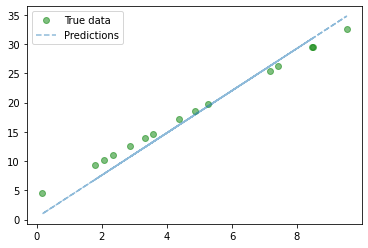

In [45]:
from matplotlib import pyplot as plt

##plot the predicted values along with the true values
plt.plot(x_test, y_test , 'go', label='True data', alpha=0.5)
plt.plot(x_test, predicted , '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()

In [46]:
print(model.state_dict()['linear.weight'])
print(model.state_dict()['linear.bias'])

tensor([[3.6076]])
tensor([0.3897])
